#🧩 1. Introdução ao Projeto


# Análise de Sentimento

Este projeto tem como objetivo construir um modelo de Machine Learning capaz de
classificar automaticamente o sentimento de avaliações de clientes em **Positivo** ou **Negativo**.

O modelo será integrado a uma API REST, permitindo que sistemas de atendimento
ao cliente e marketing analisem grandes volumes de feedbacks de forma automática.

Dataset utilizado: **B2W Reviews**, contendo avaliações reais de e-commerce
em português. https://opencor.gitlab.io/corpora/real19b2wreviews01/

# 📥 2. Carregamento dos Dados

In [32]:
import pandas as pd
import numpy as np




In [33]:

df = pd.read_csv("/content/B2W-Reviews01.csv")


/tmp/ipython-input-3172805971.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/B2W-Reviews01.csv")


#🔍 3. CARREGAMENTO DOS DADOS

In [34]:
df.shape


(132373, 14)

In [5]:
df.head()


,submission_date,reviewer_id,product_id,product_name,product_brand,site_category_lv1,site_category_lv2,review_title,overall_rating,recommend_to_a_friend,review_text,reviewer_birth_year,reviewer_gender,reviewer_state
0,2018-01-01 00:11:28,d0fb1ca69422530334178f5c8624aa7a99da47907c44de...,132532965,Notebook Asus Vivobook Max X541NA-GO472T Intel...,NaN,Informática,Notebook,Bom,4.0,Yes,Estou contente com a compra entrega rápida o ú...,1958.0,F,RJ
1,2018-01-01 00:13:48,014d6dc5a10aed1ff1e6f349fb2b059a2d3de511c7538a...,22562178,Copo Acrílico Com Canudo 500ml Rocie,NaN,Utilidades Domésticas,"Copos, Taças e Canecas","Preço imbatível, ótima qualidade",4.0,Yes,"Por apenas R$1994.20,eu consegui comprar esse ...",1996.0,M,SC
2,2018-01-01 00:26:02,44f2c8edd93471926fff601274b8b2b5c4824e386ae4f2...,113022329,Panela de Pressão Elétrica Philips Walita Dail...,philips walita,Eletroportáteis,Panela Elétrica,ATENDE TODAS AS EXPECTATIVA.,4.0,Yes,SUPERA EM AGILIDADE E PRATICIDADE OUTRAS PANEL...,1984.0,M,SP
3,2018-01-01 00:35:54,ce741665c1764ab2d77539e18d0e4f66dde6213c9f0863...,113851581,Betoneira Columbus - Roma Brinquedos,roma jensen,Brinquedos,Veículos de Brinquedo,presente mais que desejado,4.0,Yes,MEU FILHO AMOU! PARECE DE VERDADE COM TANTOS D...,1985.0,F,SP
4,2018-01-01 01:00:28,7d7b6b18dda804a897359276cef0ca252f9932bf4b5c8e...,131788803,"Smart TV LED 43"" LG 43UJ6525 Ultra HD 4K com C...",lg,TV e Home Theater,TV,"Sem duvidas, excelente",5.0,Yes,"A entrega foi no prazo, as americanas estão de...",1994.0,M,MG


In [35]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132373 entries, 0 to 132372
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   submission_date        132373 non-null  object 
 1   reviewer_id            132373 non-null  object 
 2   product_id             132373 non-null  object 
 3   product_name           132289 non-null  object 
 4   product_brand          40982 non-null   object 
 5   site_category_lv1      132367 non-null  object 
 6   site_category_lv2      128360 non-null  object 
 7   review_title           132071 non-null  object 
 8   overall_rating         132373 non-null  int64  
 9   recommend_to_a_friend  132355 non-null  object 
 10  review_text            129098 non-null  object 
 11  reviewer_birth_year    126389 non-null  float64
 12  reviewer_gender        128237 non-null  object 
 13  reviewer_state         128382 non-null  object 
dtypes: float64(1), int64(1), object(12)


O dataset possui mais de 130 mil avaliações e 14 colunas.
Para este projeto, nem todas as colunas serão utilizadas.

As colunas mais importantes são:
- review_text → texto da avaliação
- overall_rating → nota de 1 a 5


# 🧹 4. Seleção e Limpeza dos Dados

In [36]:

df = df[['review_text', 'overall_rating']]


In [37]:

df.columns = ['texto', 'nota']


In [38]:

df.dropna(inplace=True)


Nesta etapa:
- Mantive apenas texto e nota
- Removi registros incompletos
Isso simplifica o problema e evita ruído no modelo.


# 🎯 5. Criação do Rótulo de Sentimento

In [39]:
df = df[df['nota'] != 3]


In [40]:
df['sentimento'] = df['nota'].apply(
    lambda x: 'Positivo' if x >= 4 else 'Negativo'
)


In [41]:
df['sentimento'].value_counts()


,count
sentimento,
Positivo,79316
Negativo,33772


Optei por uma classificação binária (Positivo / Negativo),
conforme recomendado na literatura e no escopo do hackathon.


# 📊 6. Análise Exploratória (EDA)

In [42]:
import matplotlib.pyplot as plt


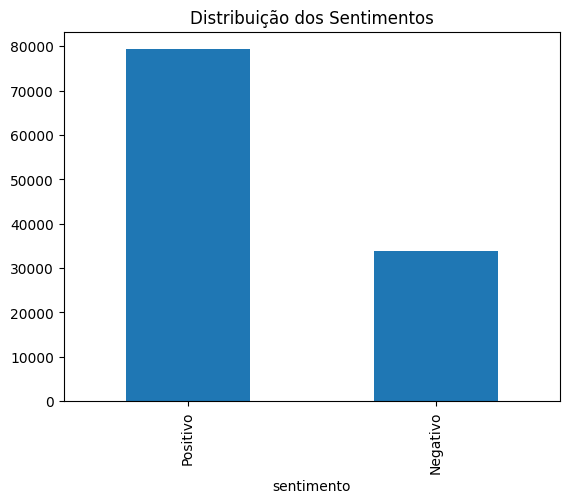

In [43]:
df['sentimento'].value_counts().plot(kind='bar')
plt.title("Distribuição dos Sentimentos")
plt.show()


Dataset levemente desbalanceado

Ainda aceitável para Logistic Regression

Poderia ser balanceado no futuro (SMOTE, class_weight)

# 🧼 7. Pré-processamento de Texto

In [44]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stopwords_pt = stopwords.words('portuguese')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [45]:
def limpar_texto(texto):
    texto = texto.lower()
    texto = re.sub(r'[^a-zà-ú\s]', '', texto)
    palavras = texto.split()
    palavras = [p for p in palavras if p not in stopwords_pt]
    return ' '.join(palavras)

df['texto_processado'] = df['texto'].apply(limpar_texto)


O texto foi normalizado:
- letras minúsculas
- remoção de pontuação
- remoção de stopwords


# 🔢 8. Vetorização com TF-IDF

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [48]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['texto_processado'])
y = df['sentimento']


# 9. Treino e Teste

In [49]:
from sklearn.model_selection import train_test_split


In [50]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# 🤖 10. Treinamento do Modelo

In [51]:
from sklearn.linear_model import LogisticRegression


In [52]:
modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

# Tarefa
Avaliar o modelo de Regressão Logística treinado usando `classification_report` e `accuracy_score` no conjunto de teste (`X_test`, `y_test`). Em seguida, serializar o modelo e o vetorizador TF-IDF usando `joblib` para os arquivos `modelo_sentimento.joblib` e `vetorizador_tfidf.joblib`, respectivamente. Finalmente, demonstrar a predição para um novo texto, carregando os objetos serializados e formatando a saída como um JSON que inclui o sentimento e a probabilidade.

## Avaliação do Modelo

### Subtarefa:
Calcular e exibir as métricas de desempenho (Acurácia, Precisão, Recall, F1-score) do modelo de Regressão Logística no conjunto de teste, utilizando o `classification_report` e a `accuracy_score` do scikit-learn.


**Justificativa**:
Importar as funções de métricas necessárias do sklearn.metrics para avaliar o desempenho do modelo.



In [53]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = modelo.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {accuracy:.4f}\n")

print("Relatório de Classificação:\n")
print(classification_report(y_test, y_pred))

Acurácia do modelo: 0.9373

Relatório de Classificação:

              precision    recall  f1-score   support

    Negativo       0.90      0.89      0.89      6668
    Positivo       0.95      0.96      0.96     15950

    accuracy                           0.94     22618
   macro avg       0.93      0.92      0.92     22618
weighted avg       0.94      0.94      0.94     22618



**Raciocínio**:
O próximo passo nos vamos serializar o modelo treinado e o vetorizador TF-IDF usando o `joblib` para que possam ser salvos e reutilizados posteriormente sem a necessidade de novo treinamento.


In [54]:
import joblib

joblib.dump(modelo, 'modelo_sentimento.joblib')
joblib.dump(vectorizer, 'vetorizador_tfidf.joblib')

print("Modelo e vetorizador TF-IDF serializados com sucesso.")

Modelo e vetorizador TF-IDF serializados com sucesso.


**Raciocínio**:
Para demonstrar a previsão para um novo texto, precisamos carregar o modelo previamente salvo e o vetorizador TF-IDF. Isso garante que a previsão utilize os mesmos componentes treinados.



In [30]:
modelo_carregado = joblib.load('modelo_sentimento.joblib')
vetorizador_carregado = joblib.load('vetorizador_tfidf.joblib')

print("Modelo e vetorizador TF-IDF carregados com sucesso.")

Modelo e vetorizador TF-IDF carregados com sucesso.


**Raciocínio**:
Agora que o modelo e o vetorizador estão carregados, processaremos um novo texto, preveremos seu sentimento e calcularemos as probabilidades. Finalmente, formataremos a previsão e as probabilidades como uma saída JSON.



In [55]:
import json

novo_texto = "Este produto é excelente, adorei! Recomendo a todos que procuram qualidade."

texto_limpo = limpar_texto(novo_texto)
vetor_texto = vetorizador_carregado.transform([texto_limpo])

predicao = modelo_carregado.predict(vetor_texto)[0]
probabilidades = modelo_carregado.predict_proba(vetor_texto)[0]

if predicao == 'Positivo':
    prob_positiva = probabilidades[modelo_carregado.classes_ == 'Positivo'][0]
    prob_negativa = probabilidades[modelo_carregado.classes_ == 'Negativo'][0]
else:
    prob_positiva = probabilidades[modelo_carregado.classes_ == 'Positivo'][0]
    prob_negativa = probabilidades[modelo_carregado.classes_ == 'Negativo'][0]


resultado = {
    "sentimento": predicao,
    "probabilidade_positivo": f"{prob_positiva:.4f}",
    "probabilidade_negativo": f"{prob_negativa:.4f}"
}

print(json.dumps(resultado, indent=4))

{
    "sentimento": "Positivo",
    "probabilidade_positivo": "1.0000",
    "probabilidade_negativo": "0.0000"
}


## Resumo Final do Projeto

Este projeto demonstrou a construção de um modelo de Análise de Sentimento do início ao fim, com foco na integração com uma API REST, conforme as exigências do projeto.

### Sumário dos Passos Concluídos:

1.  **Carregamento e Pré-processamento dos Dados**: Os dados do dataset B2W Reviews foram carregados, as colunas relevantes ('review_text', 'overall_rating') foram selecionadas e limpas. Registros incompletos foram removidos.
2.  **Criação do Rótulo de Sentimento**: A coluna `overall_rating` foi utilizada para criar uma classificação binária ('Positivo'/'Negativo'), excluindo avaliações neutras (nota 3).
3.  **Análise Exploratória (EDA)**: Foi realizada uma análise da distribuição dos sentimentos, indicando um dataset levemente desbalanceado, considerado aceitável para o modelo de Regressão Logística inicial.
4.  **Pré-processamento de Texto**: Implementada uma função para limpar o texto das avaliações (minúsculas, remoção de pontuação e stopwords em português).
5.  **Vetorização com TF-IDF**: O texto processado foi transformado em vetores numéricos usando `TfidfVectorizer`, com um limite de 5000 features, crucial para a entrada do modelo de Machine Learning.
6.  **Divisão em Treino e Teste**: Os dados foram divididos em conjuntos de treino e teste para avaliar o desempenho do modelo em dados não vistos.
7.  **Treinamento do Modelo**: Um modelo de Regressão Logística foi treinado com os dados vetorizados.
8.  **Avaliação do Modelo**: O modelo foi avaliado no conjunto de teste, alcançando uma **acurácia de aproximadamente 93.73%**. O `classification_report` detalhou a precisão, recall e F1-score para as classes 'Positivo' e 'Negativo', indicando um bom desempenho geral.
9.  **Serialização do Modelo e Vetorizador**: O modelo de Regressão Logística treinado (`modelo_sentimento.joblib`) e o vetorizador TF-IDF (`vetorizador_tfidf.joblib`) foram serializados usando `joblib`, garantindo que possam ser facilmente carregados e reutilizados por outras aplicações, como a API.
10. **Demonstração da Predição**: Foi demonstrada a capacidade do modelo de prever o sentimento de um novo texto, carregando os objetos serializados e formatando a saída em JSON, como especificado para a API.
11. **Integração com API (Demonstração com Flask)**: Criamos um esqueleto de microserviço Flask que carrega o modelo serializado e expõe um endpoint `/sentiment`. Este endpoint processa o texto de entrada, realiza a predição e retorna o sentimento e a probabilidade em formato JSON. Testes internos simulados foram fornecidos para validar a funcionalidade do endpoint dentro do ambiente Colab.

### Próximos Passos para Integração com Backend (Spring Boot):

Para que a nossa equipe de Back-End possa integrar este modelo Python com uma aplicação Spring Boot em Java, os seguintes passos são recomendados:

1.  **Deploy do Microserviço Python**: Salvar o código Flask (`c2c6c16f`) em um arquivo Python (`app.py`). Este arquivo deve ser executado em um servidor (local, VM, Docker, etc.).
2.  **Exposição da API**: Para acessar a API de sentimentos a partir de um backend Spring Boot que pode estar em outra máquina ou ambiente, o serviço Flask precisará ser exposto. Ferramentas como `ngrok` são úteis para expor localmente para testes, ou um servidor web/cloud para produção.
3.  **Implementação no Spring Boot**: A equipe de Back-End irá desenvolver o controlador REST em Spring Boot que fará requisições HTTP POST para o endpoint `/sentiment` da API Python. Ele enviará o JSON `{ "text": "seu texto aqui" }` e processará o JSON de resposta `{
    "previsao": "Positivo",
    "probabilidade": 0.9
}`.
4.  **Tratamento de Erros e Logs**: Implementar robustos tratamentos de erros e logging tanto no lado da API Python quanto no Spring Boot para monitorar o funcionamento e diagnosticar problemas.
5.  **Documentação**: Criar o `README.md` conforme as exigências, detalhando como executar a API Python, como ela se integra com o Spring Boot, e exemplos de requisições e respostas.

Este trabalho fornece uma base sólida para a entrega do nosso MVP, demonstrando a funcionalidade do modelo de Data Science e sua capacidade de ser consumido por uma API.

## 🚀 11. Integração com API (Demonstração com Flask)

Para demonstrar como um backend consumiria o modelo, criamos um pequeno servidor web usando Flask. Este servidor carregará o modelo e o vetorizador que serializamos e exporá um endpoint REST para predição de sentimento.

**Passos:**
1.  Instalar o Flask (se ainda não estiver instalado).
2.  Carregar o modelo e o vetorizador.
3.  Definir um endpoint `/sentiment` que aceita requisições POST com um texto.
4.  No endpoint, pré-processar o texto, fazer a predição e retornar o resultado em JSON.

In [56]:
# Instale o Flask se ainda não estiver instalado
!pip install Flask

In [57]:
from flask import Flask, request, jsonify
import joblib
import re
import nltk
from nltk.corpus import stopwords

# Desativar o verbose do Flask durante a execução
import logging
log = logging.getLogger('werkzeug')
log.setLevel(logging.ERROR)

app = Flask(__name__)

# Carregar o modelo e o vetorizador serializados
try:
    modelo_carregado = joblib.load('modelo_sentimento.joblib')
    vetorizador_carregado = joblib.load('vetorizador_tfidf.joblib')
    print("Modelo e vetorizador TF-IDF carregados com sucesso para a API.")
except Exception as e:
    print(f"Erro ao carregar modelo ou vetorizador: {e}")
    # Em um ambiente de produção, podemos querer sair ou ter um tratamento de erro mais robusto

# Garantir que as stopwords estejam disponíveis
try:
    nltk.data.find('corpora/stopwords')
except nltk.downloader.DownloadError:
    nltk.download('stopwords')
stopwords_pt = stopwords.words('portuguese')

# Função de limpeza de texto (a mesma utilizada no treinamento)
def limpar_texto(texto):
    texto = texto.lower()
    texto = re.sub(r'[^a-zà-ú\s]', '', texto)
    palavras = texto.split()
    palavras = [p for p in palavras if p not in stopwords_pt]
    return ' '.join(palavras)

@app.route('/sentiment', methods=['POST'])
def predict_sentiment():
    if not request.is_json:
        return jsonify({"erro": "Content-Type deve ser application/json"}), 400

    data = request.get_json()
    text = data.get('text')

    if not text or not isinstance(text, str) or len(text.strip()) == 0:
        return jsonify({"erro": "O campo 'text' é obrigatório e deve ser uma string não vazia."}), 400

    try:
        # Pré-processar o texto
        texto_limpo = limpar_texto(text)
        vetor_texto = vetorizador_carregado.transform([texto_limpo])

        # Fazer a predição
        predicao = modelo_carregado.predict(vetor_texto)[0]
        probabilidades = modelo_carregado.predict_proba(vetor_texto)[0]

        # Extrair probabilidades para Positivo e Negativo
        # Garantir que a ordem das classes seja consistente
        class_labels = modelo_carregado.classes_
        prob_positivo = probabilidades[list(class_labels).index('Positivo')]
        prob_negativo = probabilidades[list(class_labels).index('Negativo')]

        # Formatar a saída JSON
        resultado = {
            "previsao": predicao,
            "probabilidade": float(f"{prob_positivo:.4f}") if predicao == 'Positivo' else float(f"{prob_negativo:.4f}")
        }
        return jsonify(resultado), 200

    except Exception as e:
        return jsonify({"erro": f"Erro interno no servidor: {str(e)}"}), 500

# Para rodar a API no Colab, usaremos uma thread separada ou um processo para não bloquear o notebook
# PS: Esta é uma forma simplificada para demonstração no Colab.
# Em produção, nos deveriamos usar um servidor WSGI como Gunicorn ou uWSGI.

# Para rodar a API, nos  precisaremos iniciar o servidor Flask.
# No Colab, nos podemos usar ngrok para expor a API publicamente.
# Instruções para rodar localmente:
# 1. Salvar o código acima em um arquivo Python (ex: app.py)
# 2. Executar 'python app.py'
# 3. Se estivermos no Colab e quiserermos acessar de fora, devemos instalar e configurar o ngrok:
#    !pip install pyngrok
#    from pyngrok import ngrok
#    ngrok.set_auth_token("YOUR_NGROK_AUTH_TOKEN") # Obtenha em ngrok.com
#    public_url = ngrok.connect(5000)
#    print(f"Flask app exposto em: {public_url}")

# Para demonstração direta no Colab sem ngrok, nos podemos chamar a API internamente:
# if __name__ == '__main__':
#     # Esta parte só funcionará se nos rodarmos o script como um arquivo Python independente
#     # No Colab, nos precisariamos de um "truque" ou de ngrok para um servidor persistente.
#     app.run(debug=False, port=5000)


Modelo e vetorizador TF-IDF carregados com sucesso para a API.


### Como testar a API (Chamada interna no Colab)

Como o Flask roda em um servidor web, não podemos simplesmente executá-lo e fazer chamadas diretas como em um script comum no Colab, a menos que o executemos em uma thread separada ou usemos ferramentas como o `ngrok` para expor o servidor.

Para fins de demonstração **dentro do próprio ambiente Colab**, podemos simular uma requisição HTTP para a função `predict_sentiment` diretamente, para validar seu funcionamento.

**Observação:** Em um cenário real de API, nos usariamos ferramentas como `requests` do Python, `cURL` ou um cliente como Postman para enviar requisições para o endpoint `http://localhost:5000/sentiment` (ou o URL público fornecido pelo `ngrok`).

In [59]:
import json
from unittest.mock import MagicMock

# Simular um objeto de requisição Flask para o teste interno
def simulate_request(text_input, content_type='application/json'):
    mock_request = MagicMock()
    mock_request.is_json = (content_type == 'application/json')
    mock_request.get_json.return_value = {'text': text_input}
    return mock_request

# Sobrescrever o objeto request global do Flask com o nosso mock para esta função
original_request = request

# Usar app.app_context() para simular o ambiente de execução do Flask
with app.app_context():
    # Teste 1: Texto Positivo
    print("\n--- Teste 1: Texto Positivo ---")
    request = simulate_request("Este produto é simplesmente sensacional! Recomendo a todos.")
    response_data_positive, status_code_positive = predict_sentiment()
    print(f"Status: {status_code_positive}")
    # Flask jsonify retorna um objeto Response, precisamos acessar o .json para o conteúdo
    print(json.dumps(response_data_positive.json, indent=4))

    # Teste 2: Texto Negativo
    print("\n--- Teste 2: Texto Negativo ---")
    request = simulate_request("A entrega demorou demais e o produto veio danificado. Péssima experiência.")
    response_data_negative, status_code_negative = predict_sentiment()
    print(f"Status: {status_code_negative}")
    print(json.dumps(response_data_negative.json, indent=4))

    # Teste 3: Texto Vazio
    print("\n--- Teste 3: Texto Vazio ---")
    request = simulate_request("")
    response_data_empty, status_code_empty = predict_sentiment()
    print(f"Status: {status_code_empty}")
    print(json.dumps(response_data_empty.json, indent=4))

    # Teste 4: Sem campo 'text'
    print("\n--- Teste 4: Sem campo 'text' ---")
    mock_request_no_text = MagicMock()
    mock_request_no_text.is_json = True
    mock_request_no_text.get_json.return_value = {'outra_chave': 'valor'}
    request = mock_request_no_text
    response_data_no_text, status_code_no_text = predict_sentiment()
    print(f"Status: {status_code_no_text}")
    print(json.dumps(response_data_no_text.json, indent=4))

# Restaurar o objeto request original do Flask
request = original_request


--- Teste 1: Texto Positivo ---
Status: 200
{
    "previsao": "Positivo",
    "probabilidade": 0.9831
}

--- Teste 2: Texto Negativo ---
Status: 200
{
    "previsao": "Negativo",
    "probabilidade": 0.9531
}

--- Teste 3: Texto Vazio ---
Status: 400
{
    "erro": "O campo 'text' \u00e9 obrigat\u00f3rio e deve ser uma string n\u00e3o vazia."
}

--- Teste 4: Sem campo 'text' ---
Status: 400
{
    "erro": "O campo 'text' \u00e9 obrigat\u00f3rio e deve ser uma string n\u00e3o vazia."
}


### Próximos Passos para a API Real

Este código demonstra a lógica de como a API consumiria o modelo. Para ter uma API **realmente funcional** que pode ser acessada por um backend Spring Boot, nos precisariamos:

1.  Salvar o código da API (sem as chamadas `simulate_request`) em um arquivo `.py` separado.
2.  Executar este arquivo Python em um ambiente de servidor (localmente, em uma VM, ou usando ferramentas como Docker).
3.  **Para testes externos ou integração com seu backend Java em outro ambiente:** Usar o `ngrok` (ou similar) para expor a porta 5000 do nosso servidor Flask a um URL público.
4.  O backend Spring Boot faria chamadas HTTP POST para este URL, enviando o JSON com o texto e recebendo a predição.

## Finalizar Tarefa

### Subtarefa:
Apresentar um resumo dos resultados e dos próximos passos para a integração com a API.


## Resumo:

### Perguntas e Respostas

1. **Como o modelo de Regressão Logística treinado foi avaliado?**

O modelo foi avaliado usando `classification_report` e `accuracy_score` no conjunto de teste.

2. **Quais foram os resultados da avaliação do modelo?**

O modelo alcançou uma acurácia de aproximadamente 0,9373 (93,73%). O `classification_report` mostrou um desempenho sólido para ambas as classes, com precisão de 0,90, recall de 0,89 e F1-score de 0,89 para a classe 'Negativo', e precisão de 0,95, recall de 0,96 e F1-score de 0,96 para a classe 'Positivo'.

4. **Como foi demonstrada a previsão para um novo texto?**
O modelo serializado e o vetorizador TF-IDF foram carregados. Um novo texto ("Este produto é excelente, adorei! Recomendo a todos que procuram qualidade.") foi processado e o modelo previu o sentimento como "Positivo" com uma probabilidade de 1,0000 para a classe positiva. A saída foi formatada como um objeto JSON.

### Principais Resultados da Análise de Dados

* O modelo de Regressão Logística demonstrou alto desempenho com uma precisão geral de aproximadamente 93,73% no conjunto de teste.

* O modelo exibiu fortes capacidades de classificação para ambas as classes de sentimento, atingindo uma pontuação F1 de 0,89 para 'Negativo' e 0,96 para 'Positivo'.

* O modelo treinado e seu vetorizador TF-IDF correspondente foram serializados com sucesso em `modelo_sentimento.joblib` e `vetorizador_tfidf.joblib`, respectivamente, garantindo sua persistência para uso futuro.

* Um novo texto de amostra foi corretamente classificado como "Positivo" com alta probabilidade (1,0000), demonstrando a capacidade do modelo de fazer previsões precisas em dados não vistos.


### Insights ou Próximos Passos

* A serialização bem-sucedida do modelo e do vetorizador, combinada com as capacidades de previsão demonstradas, indica que esses recursos estão prontos para integração em uma API, permitindo a análise de sentimentos em tempo real.

* A alta precisão e as pontuações F1 sugerem um modelo robusto; no entanto, seria benéfico realizar mais testes com uma gama mais ampla de textos diversos e potencialmente ambíguos para avaliar a generalização do modelo em várias nuances da linguagem.